In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
print("Shape is:",df.shape)
print("Row's are:",df.shape[0])
print("Columns are:",df.shape[1])

Shape is: (891, 15)
Row's are: 891
Columns are: 15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [6]:
df.isnull().any().any()

True

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.isnull().sum().sum()

869

<AxesSubplot:>

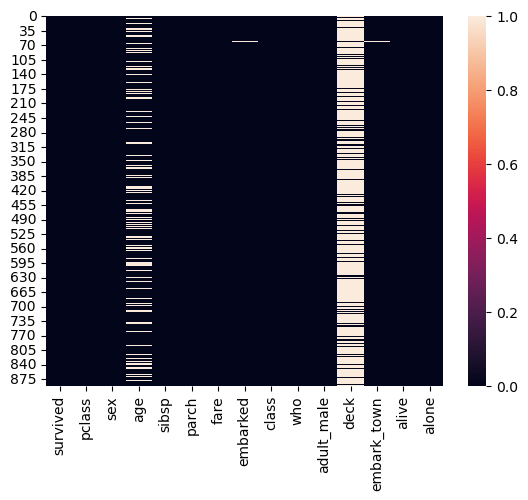

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
print(df.survived.unique())
print("\n")
print(df.survived.value_counts())

[0 1]


0    549
1    342
Name: survived, dtype: int64


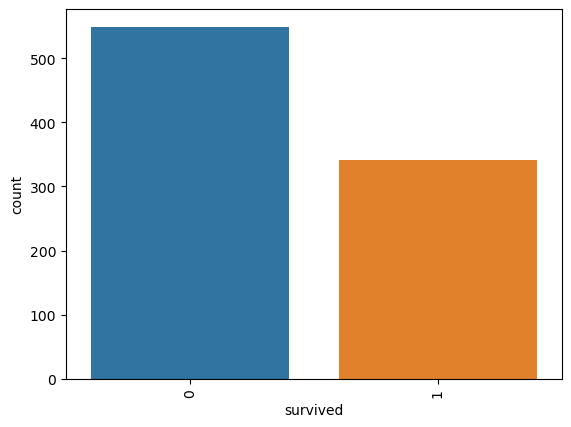

In [12]:
sns.countplot(df.survived)
plt.xticks(rotation=90)
plt.show()

In [13]:
print(df.pclass.unique())
print("\n")
print(df.pclass.value_counts())

[3 1 2]


3    491
1    216
2    184
Name: pclass, dtype: int64


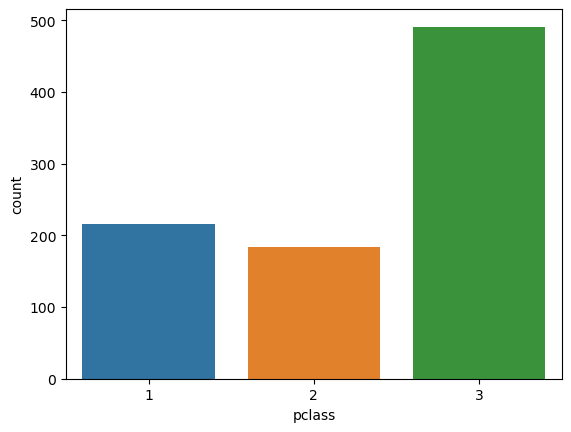

In [14]:
sns.countplot(df.pclass)
plt.show()

In [15]:
print(df.sex.unique())
print("\n")
print(df.sex.value_counts())

['male' 'female']


male      577
female    314
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

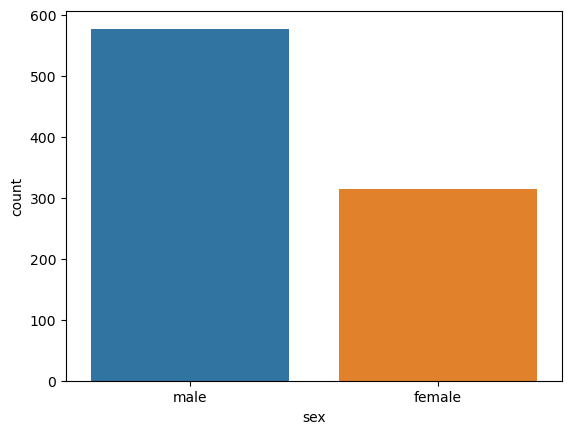

In [16]:
sns.countplot(df.sex)

In [17]:
print(df.age.unique())
print("\n")
print(df.age.value_counts())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64


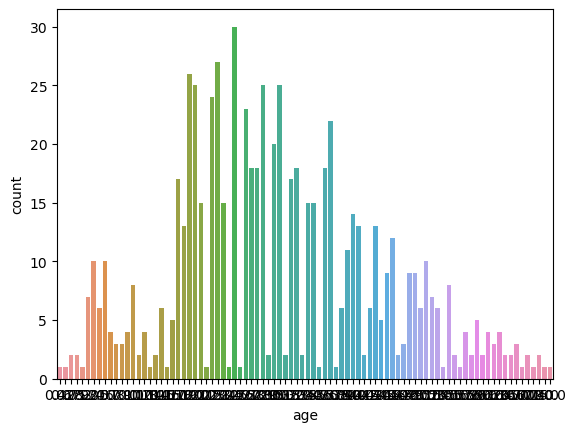

In [18]:
sns.countplot(df.age)
plt.show()

In [19]:
print(df.sibsp.unique())
print("\n")
print(df.sibsp.value_counts())

[1 0 3 4 2 5 8]


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64


<AxesSubplot:xlabel='sibsp', ylabel='count'>

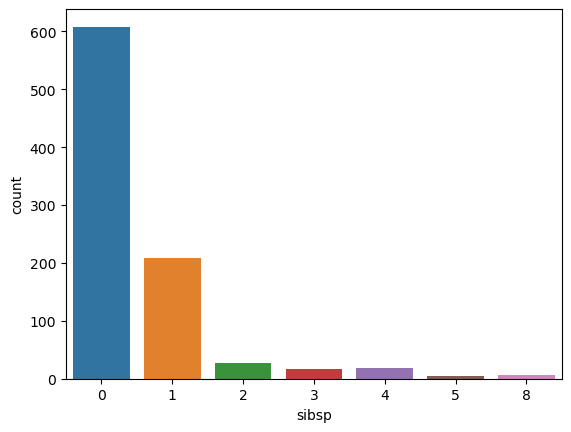

In [20]:
sns.countplot(df.sibsp)

In [21]:
print(df.parch.unique())
print("\n")
print(df.parch.value_counts())

[0 1 2 5 3 4 6]


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64


<AxesSubplot:xlabel='parch', ylabel='count'>

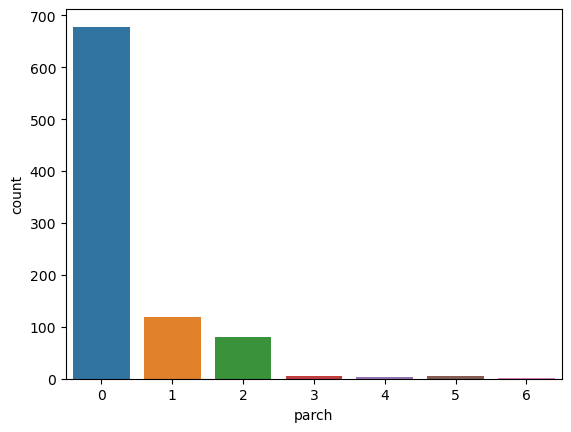

In [22]:
sns.countplot(df.parch)

In [23]:
print(df.embarked.unique())
print("\n")
print(df.embarked.value_counts())

['S' 'C' 'Q' nan]


S    644
C    168
Q     77
Name: embarked, dtype: int64


<AxesSubplot:xlabel='embarked', ylabel='count'>

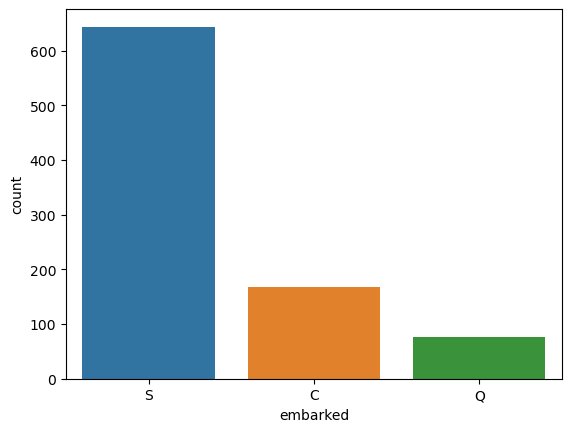

In [24]:
sns.countplot(df.embarked)

<AxesSubplot:xlabel='survived', ylabel='Count'>

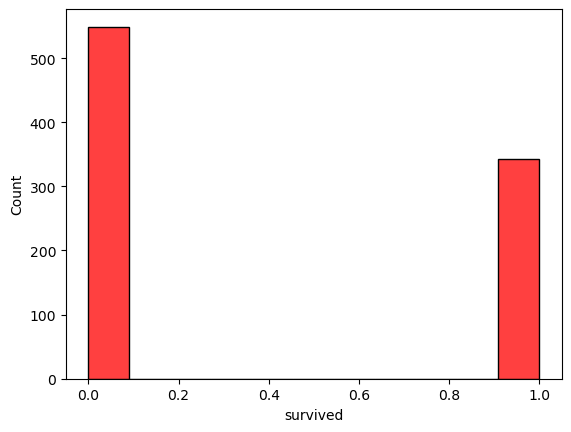

In [25]:
sns.histplot(df.survived,color='r')

<AxesSubplot:xlabel='pclass', ylabel='Count'>

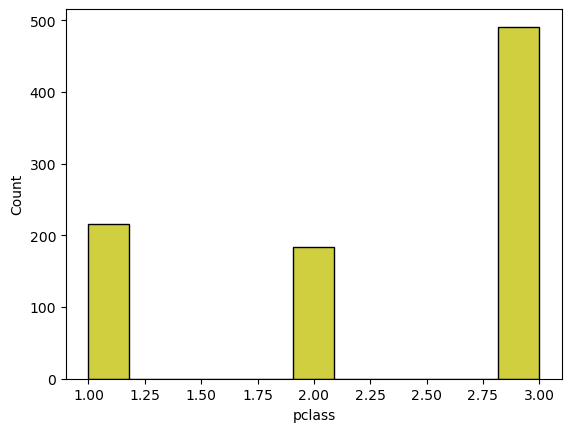

In [26]:
sns.histplot(df.pclass, color='y')

<AxesSubplot:xlabel='sex', ylabel='Count'>

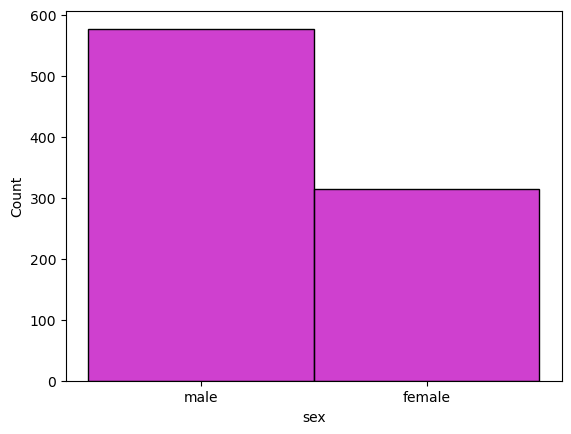

In [27]:
sns.histplot(df.sex, color='m')

<AxesSubplot:xlabel='age', ylabel='Count'>

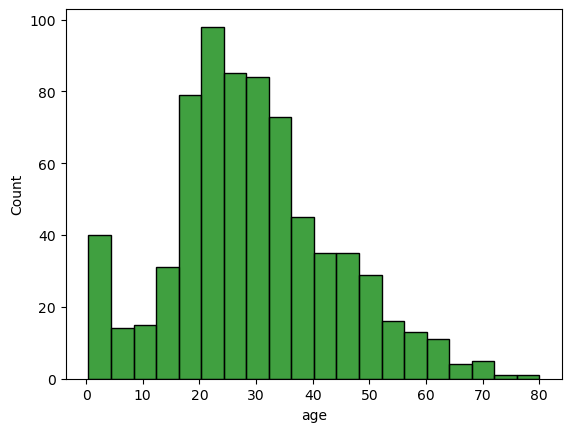

In [28]:
sns.histplot(df.age,color='g')

<AxesSubplot:xlabel='survived', ylabel='embarked'>

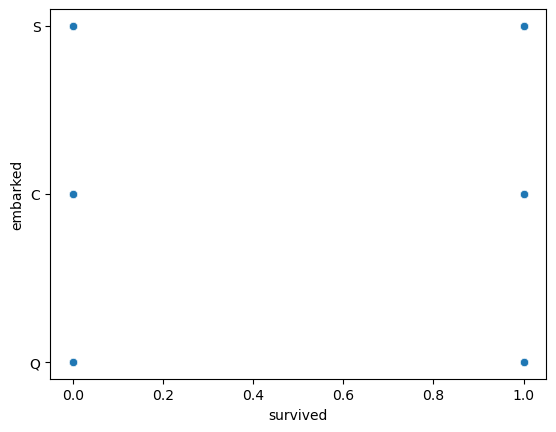

In [29]:
sns.scatterplot(df.survived, df.embarked)

<AxesSubplot:xlabel='survived', ylabel='embarked'>

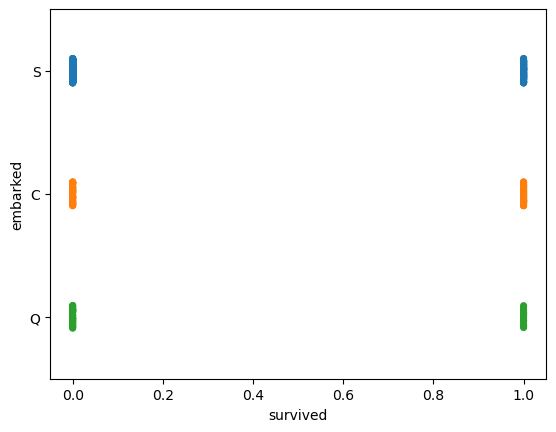

In [30]:
sns.stripplot(df.survived, df.embarked)

<AxesSubplot:xlabel='survived', ylabel='age'>

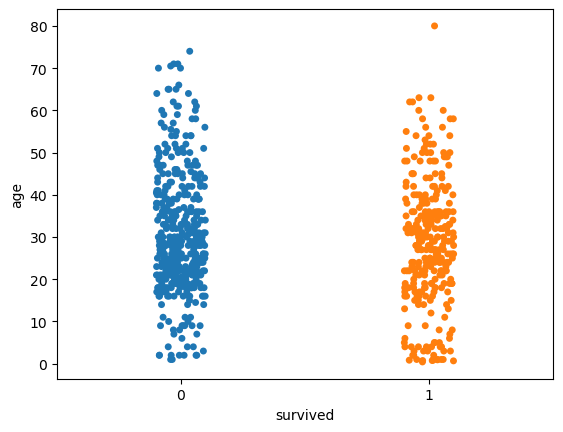

In [31]:
sns.stripplot(df.survived, df.age)

<AxesSubplot:xlabel='survived', ylabel='sibsp'>

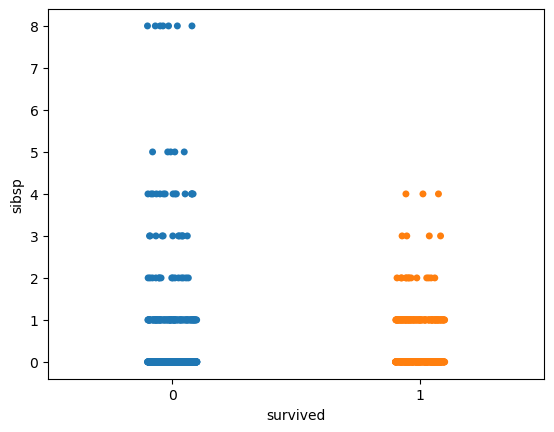

In [32]:
sns.stripplot(df.survived, df.sibsp)

<AxesSubplot:xlabel='survived'>

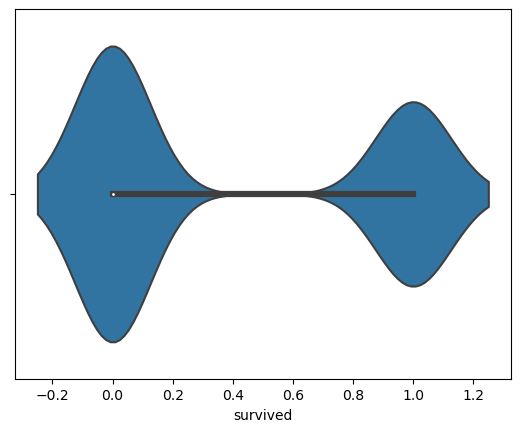

In [33]:
sns.violinplot(df.survived)

<AxesSubplot:xlabel='pclass'>

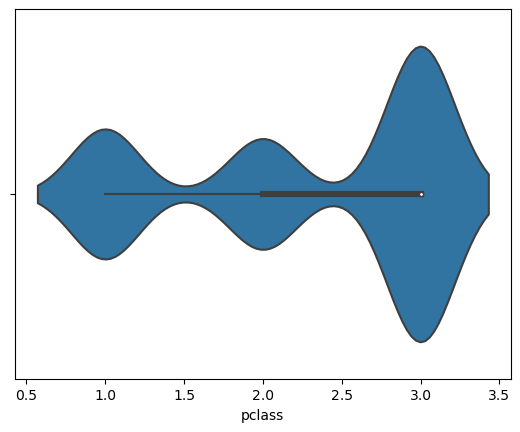

In [34]:
 sns.violinplot(df.pclass)

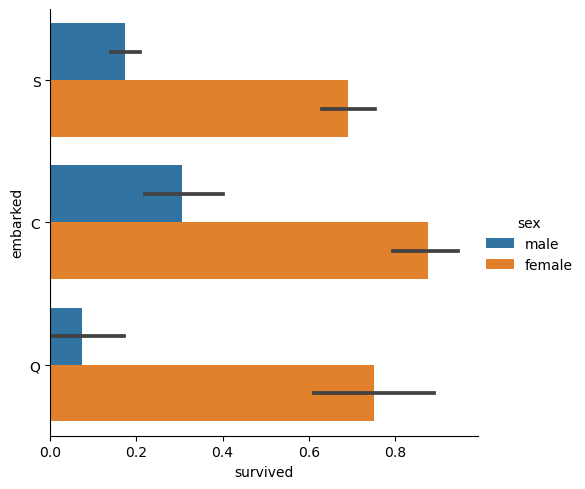

In [35]:
sns.catplot(x='survived',y="embarked",hue='sex',kind='bar',data=df)

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [38]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [39]:
df['age']=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df['age'].values.reshape(-1,1))
l=['deck','embarked',"embark_town"]
for i in l:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

In [40]:
df.isnull().sum().sum()

0

In [41]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [42]:
df1=df.drop(["who","embark_town"],axis=1)
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,C,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,C,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,C,no,True


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()

In [45]:
l=['sex','embarked','class','adult_male','deck','alive','alone']
for i in l:
    df1[i]=le.fit_transform(df1[i])

In [46]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,0,2,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,2,0,1


In [47]:
df1.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,alive,alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476,1.308642,0.602694,2.084175,0.383838,0.602694
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503,0.836071,0.489615,0.705267,0.486592,0.489615
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,2.000000,1.000000,6.000000,1.000000,1.000000


In [48]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
sex,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
embarked,891.0,1.536476,0.791503,0.00,1.0000,2.000000,2.0,2.0000
class,891.0,1.308642,0.836071,0.00,1.0000,2.000000,2.0,2.0000
adult_male,891.0,0.602694,0.489615,0.00,0.0000,1.000000,1.0,1.0000


In [49]:
df1.skew().sort_values()

embarked     -1.264823
pclass       -0.630548
class        -0.630548
sex          -0.618921
alone        -0.420431
adult_male   -0.420431
age           0.434488
survived      0.478523
alive         0.478523
deck          1.979635
parch         2.749117
sibsp         3.695352
fare          4.787317
dtype: float64

<AxesSubplot:xlabel='pclass', ylabel='Density'>

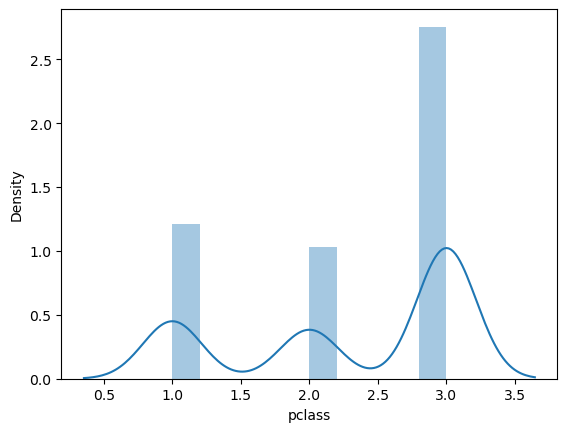

In [50]:
sns.distplot(df1.pclass)

<AxesSubplot:xlabel='parch', ylabel='Density'>

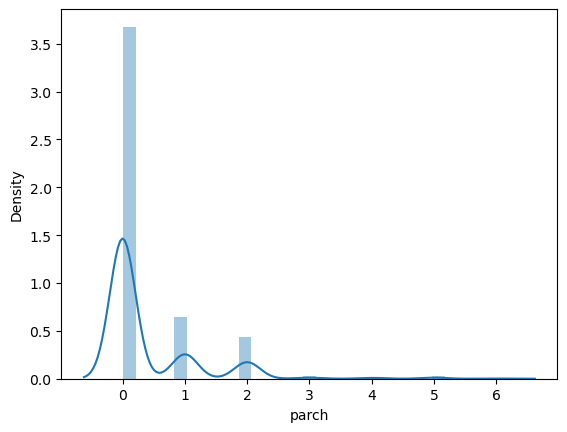

In [51]:
sns.distplot(df1.parch)

<Figure size 2100x1100 with 0 Axes>

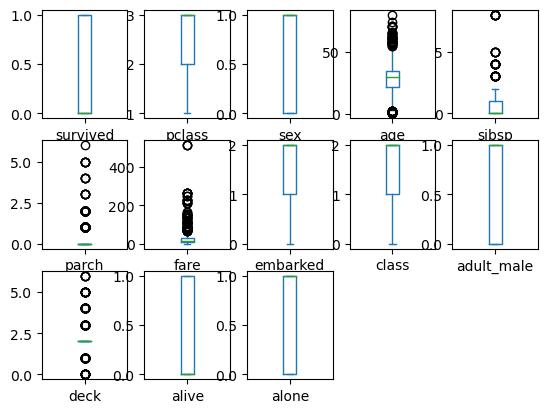

In [52]:
plt.figure(figsize=(21,11))
df1.plot(kind='box',subplots='True',layout=(3,5))
plt.show()

In [53]:
from scipy.stats import zscore

In [54]:
z=np.abs(zscore(df1))
np.where(z>3)

(array([ 10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,  88,
         96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182, 183,
        193, 201, 205, 233, 251, 258, 261, 266, 278, 299, 311, 324, 340,
        341, 345, 360, 377, 380, 386, 394, 437, 438, 438, 480, 493, 516,
        527, 541, 542, 557, 567, 610, 618, 630, 638, 672, 678, 679, 683,
        686, 689, 699, 700, 715, 716, 730, 736, 737, 742, 745, 774, 776,
        779, 787, 792, 813, 824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([10,  5,  4,  5,  6,  4,  4, 10,  4,  4, 10,  5,  6,  3,  3,  6,  4,
        10, 10,  4,  4,  5,  4,  4,  4, 10, 10,  4, 10,  4, 10,  6,  4,  4,
         4,  6,  6,  4, 10,  6, 10,  5,  6,  6,  4, 10,  5,  5,  6,  4,  3,
        10,  6,  4,  4,  6,  5,  5, 10,  3,  5,  3,  5,  6,  4,  4,  6, 10,
         6, 10,  6,  6,  5,  6,  6,  3,  5, 10,  6,  4,  4,  4,  4,  4,  4,
         3,  5,  4,  5], dtype=int64))

In [55]:
df2=df1.drop(['pclass','age','sibsp'],axis=1)

In [56]:
import scipy.stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
x=df2.drop('survived',axis=1)
x.head()

,sex,parch,fare,embarked,class,adult_male,deck,alive,alone
0,1,0,7.2500,2,2,1,2,0,0
1,0,0,71.2833,0,0,0,2,1,0
2,0,0,7.9250,2,2,0,2,1,1
3,0,0,53.1000,2,0,0,2,1,0
4,1,0,8.0500,2,2,1,2,0,1


In [58]:
y=df2['survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [59]:
def vif():
    df3=pd.DataFrame()
    df3['Features']=x.columns
    df3['VIF_Score']=[variance_inflation_factor(x.values,k)for k in range(x.shape[1])]
    print(df3)

In [60]:
vif()

     Features  VIF_Score
0         sex  17.134740
1       parch   1.959465
2        fare   1.841836
3    embarked   4.699665
4       class   4.293372
5  adult_male  17.393188
6        deck   7.101814
7       alive   2.233830
8       alone   3.941334


In [61]:
df3=df2.drop(['parch'],axis=1)
df3.head()

,survived,sex,fare,embarked,class,adult_male,deck,alive,alone
0,0,1,7.2500,2,2,1,2,0,0
1,1,0,71.2833,0,0,0,2,1,0
2,1,0,7.9250,2,2,0,2,1,1
3,1,0,53.1000,2,0,0,2,1,0
4,0,1,8.0500,2,2,1,2,0,1


In [62]:
df4=df3[(z<3).all(axis=1)]
df4

,survived,sex,fare,embarked,class,adult_male,deck,alive,alone
0,0,1,7.2500,2,2,1,2,0,0
1,1,0,71.2833,0,0,0,2,1,0
2,1,0,7.9250,2,2,0,2,1,1
3,1,0,53.1000,2,0,0,2,1,0
4,0,1,8.0500,2,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...
886,0,1,13.0000,2,1,1,2,0,1
887,1,0,30.0000,2,0,0,1,1,1
888,0,0,23.4500,2,2,0,2,0,0
889,1,1,30.0000,0,0,1,2,1,1


In [63]:
x=df4.iloc[:,1:]
x.head(3)

,sex,fare,embarked,class,adult_male,deck,alive,alone
0,1,7.2500,2,2,1,2,0,0
1,0,71.2833,0,0,0,2,1,0
2,0,7.9250,2,2,0,2,1,1


In [64]:
y=df4.iloc[:,0]
y.head(3)

0    0
1    1
2    1
Name: survived, dtype: int64

In [65]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [66]:
xf=st.fit_transform(x)
xf

array([[ 0.71571018, -0.62435099,  0.58800525, ..., -0.0761036 ,
        -0.79297115, -1.34450448],
       [-1.39721361,  1.50643544, -1.93695848, ..., -0.0761036 ,
         1.26107993, -1.34450448],
       [-1.39721361, -0.60188954,  0.58800525, ..., -0.0761036 ,
         1.26107993,  0.74376844],
       ...,
       [-1.39721361, -0.08527616,  0.58800525, ..., -0.0761036 ,
        -0.79297115, -1.34450448],
       [ 0.71571018,  0.1326831 , -1.93695848, ..., -0.0761036 ,
         1.26107993,  0.74376844],
       [ 0.71571018, -0.60771288, -0.67447661, ..., -0.0761036 ,
        -0.79297115,  0.74376844]])

In [67]:
xf.mean()

1.1613790045892049e-17

In [68]:
xf.std()

1.0

In [69]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
smt=SMOTE()

In [72]:
x,y=smt.fit_resample(x,y)
y.value_counts()

0    493
1    493
Name: survived, dtype: int64

In [73]:
y

0      0
1      1
2      1
3      1
4      0
      ..
981    1
982    1
983    1
984    1
985    1
Name: survived, Length: 986, dtype: int64

In [74]:
x.shape

(986, 8)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [76]:
lr=LogisticRegression()

In [77]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if accuracy_score(pred_train,y_train) == accuracy_score(pred_test,y_test):
        print("At random state",i,"the model perform very well")
        print("At random state",i)
        print("Training Accuracy Score is",accuracy_score(pred_train,y_train))
        print("Testing Accuracy Score is", accuracy_score(pred_test,y_test))
        print("\n")

At random state 0 the model perform very well
At random state 0
Training Accuracy Score is 1.0
Testing Accuracy Score is 1.0


At random state 1 the model perform very well
At random state 1
Training Accuracy Score is 1.0
Testing Accuracy Score is 1.0


At random state 2 the model perform very well
At random state 2
Training Accuracy Score is 1.0
Testing Accuracy Score is 1.0


At random state 3 the model perform very well
At random state 3
Training Accuracy Score is 1.0
Testing Accuracy Score is 1.0


At random state 4 the model perform very well
At random state 4
Training Accuracy Score is 1.0
Testing Accuracy Score is 1.0


At random state 5 the model perform very well
At random state 5
Training Accuracy Score is 1.0
Testing Accuracy Score is 1.0


At random state 6 the model perform very well
At random state 6
Training Accuracy Score is 1.0
Testing Accuracy Score is 1.0


At random state 7 the model perform very well
At random state 7
Training Accuracy Score is 1.0
Testing Accuracy

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr.fit(x_train,y_train)

LogisticRegression()

In [79]:
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [80]:
print("The training accuracy score is:", accuracy_score(y_train,pred_train))
print("The testing accuracy score is:", accuracy_score(y_test,pred_test))
print("\n Classification Report \n", classification_report(y_test,pred_test))
print( "\n Confusion Matrix \n", confusion_matrix(y_test,pred_test))

The training accuracy score is: 1.0
The testing accuracy score is: 1.0

 Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        90

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198


 Confusion Matrix 
 [[108   0]
 [  0  90]]


In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
for i in range(2,15):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_accuracy_score=cv_score.mean()
    print(f'At the k-fold {i} the cross value score is {cv_accuracy_score}')
    print(f'The testing accuracy score of logistic model is {accuracy_score(y_test,pred_test)}')
    print("\n")

At the k-fold 2 the cross value score is 1.0
The testing accuracy score of logistic model is 1.0


At the k-fold 3 the cross value score is 1.0
The testing accuracy score of logistic model is 1.0


At the k-fold 4 the cross value score is 1.0
The testing accuracy score of logistic model is 1.0


At the k-fold 5 the cross value score is 1.0
The testing accuracy score of logistic model is 1.0


At the k-fold 6 the cross value score is 1.0
The testing accuracy score of logistic model is 1.0


At the k-fold 7 the cross value score is 1.0
The testing accuracy score of logistic model is 1.0


At the k-fold 8 the cross value score is 1.0
The testing accuracy score of logistic model is 1.0


At the k-fold 9 the cross value score is 1.0
The testing accuracy score of logistic model is 1.0


At the k-fold 10 the cross value score is 1.0
The testing accuracy score of logistic model is 1.0


At the k-fold 11 the cross value score is 1.0
The testing accuracy score of logistic model is 1.0


At the k

In [83]:
cv_score=cross_val_score(lr,x,y,cv=5)
cv_accuracy_score=cv_score.mean()
print(f'At the k-fold {5} the cross value score for the model is {cv_accuracy_score}')
print(f'The testing score for the model is {accuracy_score(y_test,pred_test)}')

At the k-fold 5 the cross value score for the model is 1.0
The testing score for the model is 1.0


In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [85]:
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
    algorithm.fit(x_train,y_train)
    train_pred=algorithm.predict(x_train)
    test_pred=algorithm.predict(x_test)
    print("For",algorithm)
    print("Training Accuracy_score =",accuracy_score(y_train,train_pred))
    print("Testing Acuracy Score =", accuracy_score(y_test,test_pred))
    print(" \n Classification Report \n", classification_report(y_test,test_pred))
    print(" \n Confusion Materix \n", confusion_matrix(y_test,test_pred))
    print(" \n AOC RUC CURVE \n")
    prob= algorithm.predict_proba(x_test)[:,1]
    FPR, TPR, THRESHOLD=roc_curve(y_test,prob)
    plt.plot(FPR,TPR)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC CURVE")
    plt.show()
    ROC_AUC_SCORE=roc_auc_score(y_test,test_pred)
    print("\n")
    print("Finding out the best k-fold value")
    print("\n\t")
    for i in range(2,15):
        cv_score=cross_val_score(algorithm,x,y,cv=i)
        cv_accuracy_score=cv_score.mean()
        print(f"At the k-fold {i} the cv score of model {algorithm} is {cv_accuracy_score}")
        print("\n")

For LogisticRegression()
Training Accuracy_score = 1.0
Testing Acuracy Score = 1.0
 
 Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        90

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198

 
 Confusion Materix 
 [[108   0]
 [  0  90]]
 
 AOC RUC CURVE 



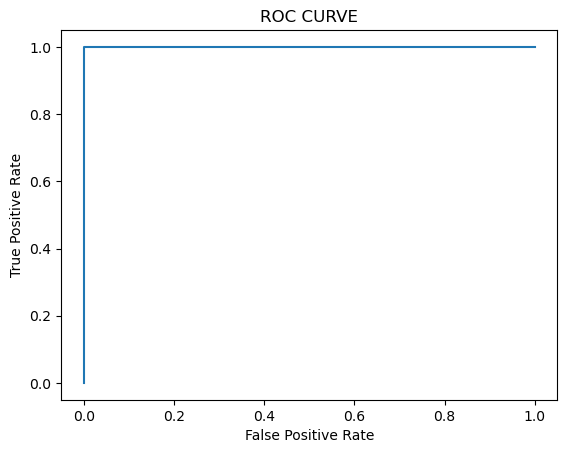



Finding out the best k-fold value

	
At the k-fold 2 the cv score of model LogisticRegression() is 1.0


At the k-fold 3 the cv score of model LogisticRegression() is 1.0


At the k-fold 4 the cv score of model LogisticRegression() is 1.0


At the k-fold 5 the cv score of model LogisticRegression() is 1.0


At the k-fold 6 the cv score of model LogisticRegression() is 1.0


At the k-fold 7 the cv score of model LogisticRegression() is 1.0


At the k-fold 8 the cv score of model LogisticRegression() is 1.0


At the k-fold 9 the cv score of model LogisticRegression() is 1.0


At the k-fold 10 the cv score of model LogisticRegression() is 1.0


At the k-fold 11 the cv score of model LogisticRegression() is 1.0


At the k-fold 12 the cv score of model LogisticRegression() is 1.0


At the k-fold 13 the cv score of model LogisticRegression() is 1.0


At the k-fold 14 the cv score of model LogisticRegression() is 1.0




In [86]:
model(lr,x,y)

In [87]:
gnb=GaussianNB()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
dtc=DecisionTreeClassifier()

For GaussianNB()
Training Accuracy_score = 1.0
Testing Acuracy Score = 1.0
 
 Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        90

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198

 
 Confusion Materix 
 [[108   0]
 [  0  90]]
 
 AOC RUC CURVE 



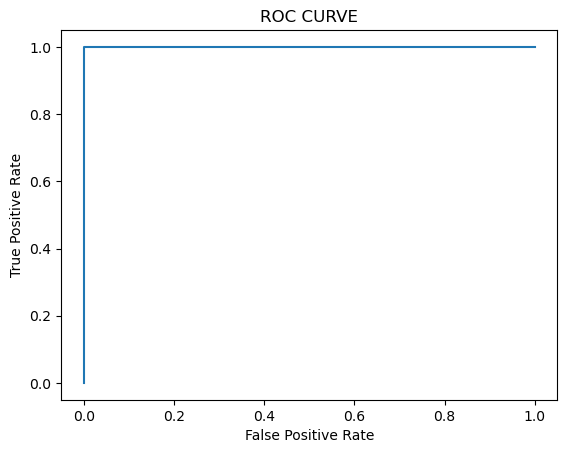



Finding out the best k-fold value

	
At the k-fold 2 the cv score of model GaussianNB() is 1.0


At the k-fold 3 the cv score of model GaussianNB() is 1.0


At the k-fold 4 the cv score of model GaussianNB() is 1.0


At the k-fold 5 the cv score of model GaussianNB() is 1.0


At the k-fold 6 the cv score of model GaussianNB() is 1.0


At the k-fold 7 the cv score of model GaussianNB() is 1.0


At the k-fold 8 the cv score of model GaussianNB() is 1.0


At the k-fold 9 the cv score of model GaussianNB() is 1.0


At the k-fold 10 the cv score of model GaussianNB() is 1.0


At the k-fold 11 the cv score of model GaussianNB() is 1.0


At the k-fold 12 the cv score of model GaussianNB() is 1.0


At the k-fold 13 the cv score of model GaussianNB() is 1.0


At the k-fold 14 the cv score of model GaussianNB() is 1.0




In [88]:
model(gnb,x,y)

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
dict1={'weights':['uniform','distance']}
dict2={'criterion':['gini','entropy']}
dict3={'gamma':['scale','auto']}
dict4={'algorithm':['SAMME','SAMME.R']}
dict5={'loss':['log_loss','deviance','exponential']}

In [91]:
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f"The best parameters for the model {machine} is {gd.best_params_}")

In [92]:
HPT(knn,dict1)

The best parameters for the model KNeighborsClassifier() is {'weights': 'distance'}


In [93]:
HPT(dtc,dict2)

The best parameters for the model DecisionTreeClassifier() is {'criterion': 'gini'}


In [94]:
from sklearn.svm import SVC
sv=SVC()

In [95]:
HPT(sv,dict3)

The best parameters for the model SVC() is {'gamma': 'auto'}


In [96]:
HPT(ab,dict4)

The best parameters for the model AdaBoostClassifier() is {'algorithm': 'SAMME'}


In [97]:
HPT(gb,dict5)

The best parameters for the model GradientBoostingClassifier() is {'loss': 'deviance'}


In [98]:
lr=LogisticRegression()
gnb=GaussianNB()
knn=KNeighborsClassifier(weights='distance')
dtc=DecisionTreeClassifier(criterion='gini')
sv=SVC(gamma='auto')
ab=AdaBoostClassifier(algorithm='SAMME')
gb=GradientBoostingClassifier(loss='deviance')

For KNeighborsClassifier(weights='distance')
Training Accuracy_score = 1.0
Testing Acuracy Score = 0.9141414141414141
 
 Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       108
           1       0.88      0.94      0.91        90

    accuracy                           0.91       198
   macro avg       0.91      0.92      0.91       198
weighted avg       0.92      0.91      0.91       198

 
 Confusion Materix 
 [[96 12]
 [ 5 85]]
 
 AOC RUC CURVE 



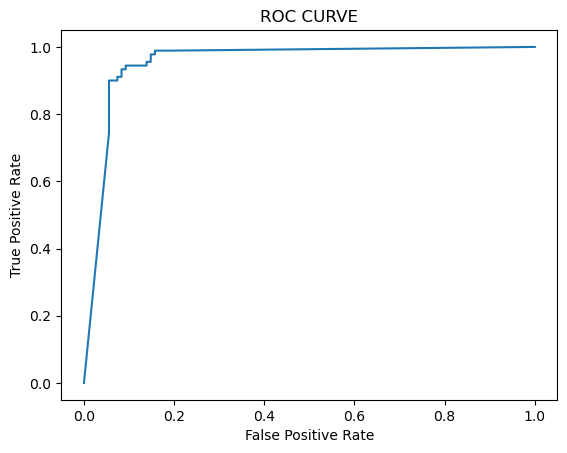



Finding out the best k-fold value

	
At the k-fold 2 the cv score of model KNeighborsClassifier(weights='distance') is 0.90973630831643


At the k-fold 3 the cv score of model KNeighborsClassifier(weights='distance') is 0.9290162354511082


At the k-fold 4 the cv score of model KNeighborsClassifier(weights='distance') is 0.935103354069978


At the k-fold 5 the cv score of model KNeighborsClassifier(weights='distance') is 0.9391990975747321


At the k-fold 6 the cv score of model KNeighborsClassifier(weights='distance') is 0.9391783690564178


At the k-fold 7 the cv score of model KNeighborsClassifier(weights='distance') is 0.9401722391084093


At the k-fold 8 the cv score of model KNeighborsClassifier(weights='distance') is 0.9462611460792028


At the k-fold 9 the cv score of model KNeighborsClassifier(weights='distance') is 0.9442035029190993


At the k-fold 10 the cv score of model KNeighborsClassifier(weights='distance') is 0.9442279942279942


At the k-fold 11 the cv score of mod

In [99]:
model(knn,x,y)

For DecisionTreeClassifier()
Training Accuracy_score = 1.0
Testing Acuracy Score = 1.0
 
 Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        90

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198

 
 Confusion Materix 
 [[108   0]
 [  0  90]]
 
 AOC RUC CURVE 



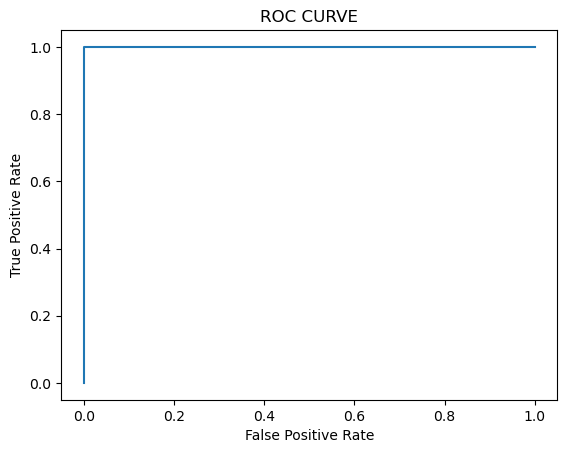



Finding out the best k-fold value

	
At the k-fold 2 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 3 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 4 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 5 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 6 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 7 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 8 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 9 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 10 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 11 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 12 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 13 the cv score of model DecisionTreeClassifier() is 1.0


At the k-fold 14 the cv score of model DecisionTreeClassifier() is 1.0




In [100]:
model(dtc,x,y)

In [101]:
Final_model=dtc
Final_model

DecisionTreeClassifier()

In [103]:
#Saving the best model
import joblib
joblib.dump(Final_model,"Titanic Dataset.pkl")

['Titanic Dataset.pkl']

In [104]:
#Predicting the saved model
model=joblib.load("Titanic Dataset.pkl")
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [105]:
actual=np.array(y_test)
df=pd.DataFrame({"Actual Value":actual,"Predicted Value":prediction})
df

,Actual Value,Predicted Value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
193,0,0
194,0,0
195,1,1
196,1,1
